<small><i>June 2019 - This notebook was created by [Oriol Pujol Vila](http://www.maia.ub.es/~oriol). Source and [license](./LICENSE.txt) info are in the folder.</i></small>

In [3]:
#pip install tensorflow-macos
#pip install tensorflow-metal

ERROR: Could not find a version that satisfies the requirement tensorflow-macos (from versions: none)
ERROR: No matching distribution found for tensorflow-macos
ERROR: Could not find a version that satisfies the requirement tensorflow-metal (from versions: none)
ERROR: No matching distribution found for tensorflow-metal


In [4]:
# What version of Python do you have?
import sys

import tensorflow.keras
import pandas as pd
import sklearn as sk
import tensorflow as tf
import platform

print(f"Python Platform: {platform.platform()}")
print(f"Tensor Flow Version: {tf.__version__}")
print()
print(f"Python {sys.version}")
print(f"Pandas {pd.__version__}")
print(f"Scikit-Learn {sk.__version__}")
gpu = len(tf.config.list_physical_devices('GPU'))>0
print("GPU is", "available" if gpu else "NOT AVAILABLE")

print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))

ModuleNotFoundError: No module named 'tensorflow'

# pill 13b. A story of deep learning

### 13b.1 Remember when...

This is not a new technique. We are talking of good old *neural networks* with very minor changes.

Remember what a neural network is:

A neural network is an ensemble technique. The idea is to combine very simple bricks together to build up a usually feedforward network.

The base functions are called neurons and are usually of the following form:

$$h(x) = \sigma({\bf w}^T {\bf x})$$

where $\sigma$ is a non-linear function. 

<img src = 'files/neuron.jpg' width = 400px>

And here comes the first change that helped deep learning to take off. This non-linear function was usually the sigmoid function:

$$\sigma(x) = \frac{1}{1+e^{-x}}$$

2023-08-26 19:14:30.557030: I metal_plugin/src/device/metal_device.cc:1154] Metal device set to: Apple M1 Max
2023-08-26 19:14:30.557058: I metal_plugin/src/device/metal_device.cc:296] systemMemory: 64.00 GB
2023-08-26 19:14:30.557062: I metal_plugin/src/device/metal_device.cc:313] maxCacheSize: 24.00 GB
2023-08-26 19:14:30.557134: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:303] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2023-08-26 19:14:30.557169: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:269] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


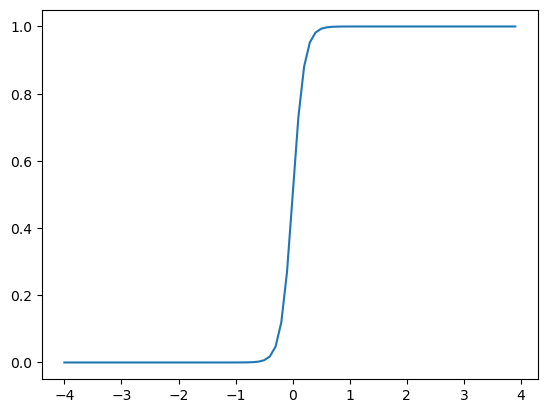

In [5]:
%matplotlib inline
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

tf.config.list_physical_devices('GPU')

x = np.arange(-4,4,0.1)
sig = tf.nn.sigmoid(10*x)

plt.plot(x,sig.numpy())

### 13b.2 Moving forward to "deep" representations

We can combine multiple layers of neurons. This will create a neural network. When the number of layers is sufficently large we call the network a *deep learner*. There are different kinds of NNs. In this basic tutorial we are concerned with NN composed of fully-connected layers.

<img src = 'files/NN.jpg' width = 500px>

The definition of a deep model requires the same steps as described before. They are:

- Define the architecture
- Define the loss function
- Define the optimization algorithm



## Fully connected architectures

In [6]:
from sklearn.datasets import load_digits
import numpy as np
data=load_digits()
X_train = data.data/16.
y_train = data.target

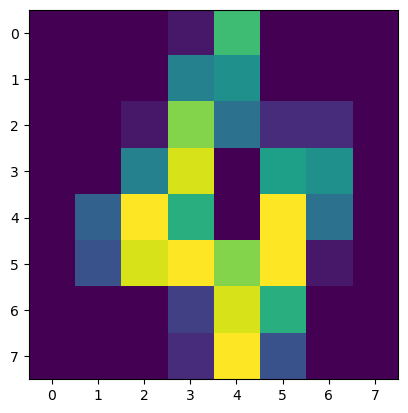

In [7]:
X_train[0,:]
import matplotlib.pyplot as plt

plt.imshow(X_train[4,:].reshape(8,8))

In [8]:
X_train.shape

(1797, 64)

In [9]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(100, activation="sigmoid"),
    tf.keras.layers.Dense(40, activation="sigmoid"),
    tf.keras.layers.Dense(1)
])

model.compile(optimizer='sgd',
              loss='mean_squared_error',
              metrics=['accuracy'])

In [10]:
model.fit(X_train, y_train, epochs=1000, batch_size = 128)

Epoch 1/1000


2023-08-26 19:14:36.585521: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


15/15 [==============================] - 2s 25ms/step - loss: 11.7935 - accuracy: 0.1018
Epoch 2/1000
15/15 [==============================] - 0s 5ms/step - loss: 8.2055 - accuracy: 0.1013
Epoch 3/1000
15/15 [==============================] - 0s 5ms/step - loss: 8.1942 - accuracy: 0.1013
Epoch 4/1000
15/15 [==============================] - 0s 5ms/step - loss: 8.2034 - accuracy: 0.1013
Epoch 5/1000
15/15 [==============================] - 0s 5ms/step - loss: 8.1593 - accuracy: 0.1013
Epoch 6/1000
15/15 [==============================] - 0s 5ms/step - loss: 8.1607 - accuracy: 0.1013
Epoch 7/1000
15/15 [==============================] - 0s 5ms/step - loss: 8.1805 - accuracy: 0.1013
Epoch 8/1000
15/15 [==============================] - 0s 5ms/step - loss: 8.1310 - accuracy: 0.1013
Epoch 9/1000
15/15 [==============================] - 0s 5ms/step - loss: 8.1301 - accuracy: 0.1013
Epoch 10/1000
15/15 [==============================] - 0s 5ms/step - loss: 8.1327 - accuracy: 0.1013
Epoch 11/1

15/15 [==============================] - 0s 5ms/step - loss: 3.5695 - accuracy: 0.1180
Epoch 163/1000
15/15 [==============================] - 0s 5ms/step - loss: 3.2259 - accuracy: 0.1163
Epoch 164/1000
15/15 [==============================] - 0s 5ms/step - loss: 3.2154 - accuracy: 0.1146
Epoch 165/1000
15/15 [==============================] - 0s 5ms/step - loss: 3.3089 - accuracy: 0.1146
Epoch 166/1000
15/15 [==============================] - 0s 5ms/step - loss: 3.2270 - accuracy: 0.1169
Epoch 167/1000
15/15 [==============================] - 0s 5ms/step - loss: 3.3202 - accuracy: 0.1163
Epoch 168/1000
15/15 [==============================] - 0s 5ms/step - loss: 3.3518 - accuracy: 0.1146
Epoch 169/1000
15/15 [==============================] - 0s 5ms/step - loss: 3.1930 - accuracy: 0.1180
Epoch 170/1000
15/15 [==============================] - 0s 5ms/step - loss: 3.4785 - accuracy: 0.1185
Epoch 171/1000
15/15 [==============================] - 0s 5ms/step - loss: 3.2407 - accuracy: 0.

15/15 [==============================] - 0s 5ms/step - loss: 2.2821 - accuracy: 0.1430
Epoch 323/1000
15/15 [==============================] - 0s 5ms/step - loss: 2.2600 - accuracy: 0.1452
Epoch 324/1000
15/15 [==============================] - 0s 5ms/step - loss: 2.2708 - accuracy: 0.1430
Epoch 325/1000
15/15 [==============================] - 0s 5ms/step - loss: 2.2286 - accuracy: 0.1430
Epoch 326/1000
15/15 [==============================] - 0s 5ms/step - loss: 2.2843 - accuracy: 0.1452
Epoch 327/1000
15/15 [==============================] - 0s 5ms/step - loss: 2.2721 - accuracy: 0.1452
Epoch 328/1000
15/15 [==============================] - 0s 5ms/step - loss: 2.3825 - accuracy: 0.1413
Epoch 329/1000
15/15 [==============================] - 0s 5ms/step - loss: 2.2752 - accuracy: 0.1408
Epoch 330/1000
15/15 [==============================] - 0s 5ms/step - loss: 2.1833 - accuracy: 0.1458
Epoch 331/1000
15/15 [==============================] - 0s 5ms/step - loss: 2.2452 - accuracy: 0.

15/15 [==============================] - 0s 5ms/step - loss: 1.3894 - accuracy: 0.1614
Epoch 483/1000
15/15 [==============================] - 0s 5ms/step - loss: 1.4827 - accuracy: 0.1603
Epoch 484/1000
15/15 [==============================] - 0s 5ms/step - loss: 1.3450 - accuracy: 0.1642
Epoch 485/1000
15/15 [==============================] - 0s 5ms/step - loss: 1.6834 - accuracy: 0.1580
Epoch 486/1000
15/15 [==============================] - 0s 5ms/step - loss: 1.3653 - accuracy: 0.1608
Epoch 487/1000
15/15 [==============================] - 0s 5ms/step - loss: 1.4099 - accuracy: 0.1642
Epoch 488/1000
15/15 [==============================] - 0s 5ms/step - loss: 1.5293 - accuracy: 0.1636
Epoch 489/1000
15/15 [==============================] - 0s 5ms/step - loss: 1.3776 - accuracy: 0.1653
Epoch 490/1000
15/15 [==============================] - 0s 5ms/step - loss: 1.4291 - accuracy: 0.1653
Epoch 491/1000
15/15 [==============================] - 0s 5ms/step - loss: 1.3800 - accuracy: 0.

15/15 [==============================] - 0s 5ms/step - loss: 1.0565 - accuracy: 0.1681
Epoch 643/1000
15/15 [==============================] - 0s 5ms/step - loss: 1.0623 - accuracy: 0.1708
Epoch 644/1000
15/15 [==============================] - 0s 5ms/step - loss: 1.0524 - accuracy: 0.1681
Epoch 645/1000
15/15 [==============================] - 0s 5ms/step - loss: 1.0459 - accuracy: 0.1697
Epoch 646/1000
15/15 [==============================] - 0s 5ms/step - loss: 1.0502 - accuracy: 0.1681
Epoch 647/1000
15/15 [==============================] - 0s 5ms/step - loss: 1.0454 - accuracy: 0.1692
Epoch 648/1000
15/15 [==============================] - 0s 5ms/step - loss: 1.0500 - accuracy: 0.1681
Epoch 649/1000
15/15 [==============================] - 0s 5ms/step - loss: 1.1226 - accuracy: 0.1692
Epoch 650/1000
15/15 [==============================] - 0s 5ms/step - loss: 1.0357 - accuracy: 0.1692
Epoch 651/1000
15/15 [==============================] - 0s 5ms/step - loss: 1.0286 - accuracy: 0.

15/15 [==============================] - 0s 5ms/step - loss: 0.8414 - accuracy: 0.1642
Epoch 803/1000
15/15 [==============================] - 0s 5ms/step - loss: 0.8657 - accuracy: 0.1681
Epoch 804/1000
15/15 [==============================] - 0s 5ms/step - loss: 0.8661 - accuracy: 0.1681
Epoch 805/1000
15/15 [==============================] - 0s 5ms/step - loss: 0.8568 - accuracy: 0.1697
Epoch 806/1000
15/15 [==============================] - 0s 5ms/step - loss: 0.8348 - accuracy: 0.1692
Epoch 807/1000
15/15 [==============================] - 0s 5ms/step - loss: 0.8426 - accuracy: 0.1658
Epoch 808/1000
15/15 [==============================] - 0s 5ms/step - loss: 0.8984 - accuracy: 0.1658
Epoch 809/1000
15/15 [==============================] - 0s 5ms/step - loss: 0.9159 - accuracy: 0.1647
Epoch 810/1000
15/15 [==============================] - 0s 5ms/step - loss: 0.8704 - accuracy: 0.1647
Epoch 811/1000
15/15 [==============================] - 0s 5ms/step - loss: 0.8408 - accuracy: 0.

15/15 [==============================] - 0s 5ms/step - loss: 0.7064 - accuracy: 0.1720
Epoch 963/1000
15/15 [==============================] - 0s 5ms/step - loss: 0.8261 - accuracy: 0.1669
Epoch 964/1000
15/15 [==============================] - 0s 5ms/step - loss: 0.7073 - accuracy: 0.1686
Epoch 965/1000
15/15 [==============================] - 0s 5ms/step - loss: 0.6941 - accuracy: 0.1675
Epoch 966/1000
15/15 [==============================] - 0s 5ms/step - loss: 0.7339 - accuracy: 0.1664
Epoch 967/1000
15/15 [==============================] - 0s 5ms/step - loss: 0.7184 - accuracy: 0.1692
Epoch 968/1000
15/15 [==============================] - 0s 5ms/step - loss: 0.7260 - accuracy: 0.1658
Epoch 969/1000
15/15 [==============================] - 0s 5ms/step - loss: 0.7895 - accuracy: 0.1647
Epoch 970/1000
15/15 [==============================] - 0s 5ms/step - loss: 0.6930 - accuracy: 0.1642
Epoch 971/1000
15/15 [==============================] - 0s 5ms/step - loss: 0.6991 - accuracy: 0.

In [13]:
model.evaluate(X_train,  y_train, verbose=2)

57/57 - 0s - loss: 0.8129 - accuracy: 0.1519 - 209ms/epoch - 4ms/step


[0.8129074573516846, 0.1519198715686798]

2/2 [==============================] - 0s 122ms/step


2023-08-26 19:15:59.862672: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


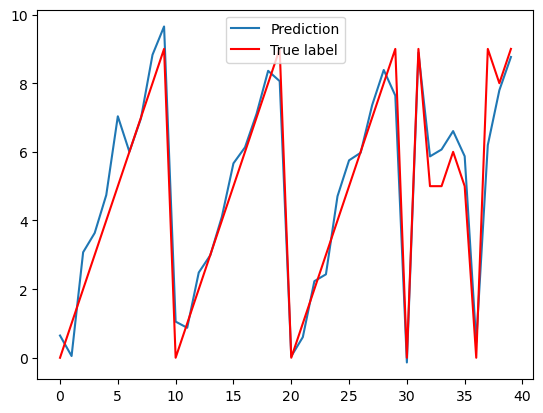

In [14]:
plt.plot(model.predict(X_train[0:40,:]),label = 'Prediction')
plt.plot(y_train[0:40],color='r',label='True label')
plt.legend()

**Observations:** It works pretty well, check the following:
- Each layer defines the number of units/neurons. This means that the output of a layer with 100 units is a 100-dimensional vector.
- The "inner" layers use the non-linearity, but the output layer is different! **Why?**
- We introduce or use the concept of **batch** and its corresponding size in the optimization algorithm. Remember that in our current setting we approximate the true loss by a noisy approximation by considering a subset of the data instead of the full dataset at each parameter update.
- We used "mean squared error" but this is useful for regression problems. What about classification as in this case?

**Let us fix some of these issues before moving to nowadays strategies:** For the case of the loss, we can change it to a different representation:

- The output instead of a single integer value can be split using one-hot-encoding. This can be interpreted as drawing a probability for each class. This means that the last layer must comply with the probability axioms. 

The most common technique for that is the use of soft-max layer. A **soft-max** is defined as follows:

$$\sigma(x_i) = \frac{e^x_i}{\sum_j e^{x_j}}$$

This adds up to one for all outputs and the outputs themselves are in the range $[0,1)$.

Then, if the outputs are interpreted as probabilities, it is sensible to use loss functions that optimize probability outputs. One of these is the **cross-entropy** defined as follows:

Given $t_i$ and $y_i$ the target label and the prediction of sample $i$, respectively, the cross-entropy loss is defined as,

$$\mathcal{L}(t_i,y_i) = -\sum_{c=1}^K t_i^c \log{y_i^c}, $$

where $c$ is the super-script indexing the vector component, i.e. the $c$-th component of the vector, and $K$ the number of classes.


In [18]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(100, activation="sigmoid"),
    tf.keras.layers.Dense(40, activation="sigmoid"),
    tf.keras.layers.Dense(10)
])

#, activation="softmax"
model.compile(optimizer='sgd',
#              loss='categorical_crossentropy',
              loss = 'mean_squared_error',
              metrics=['accuracy'])

But now we have to one-hot encode the outputs...

In [19]:
oh_y_train = tf.one_hot(y_train, 10)

In [20]:
model.fit(X_train, oh_y_train.numpy(), epochs=750, batch_size = 32)

Epoch 1/750


2023-08-26 19:16:48.319498: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


57/57 [==============================] - 1s 8ms/step - loss: 0.2636 - accuracy: 0.1018
Epoch 2/750
57/57 [==============================] - 0s 5ms/step - loss: 0.0984 - accuracy: 0.0985
Epoch 3/750
57/57 [==============================] - 0s 5ms/step - loss: 0.0917 - accuracy: 0.0863
Epoch 4/750
57/57 [==============================] - 0s 5ms/step - loss: 0.0914 - accuracy: 0.0495
Epoch 5/750
57/57 [==============================] - 0s 5ms/step - loss: 0.0913 - accuracy: 0.0523
Epoch 6/750
57/57 [==============================] - 0s 5ms/step - loss: 0.0912 - accuracy: 0.0545
Epoch 7/750
57/57 [==============================] - 0s 5ms/step - loss: 0.0912 - accuracy: 0.0607
Epoch 8/750
57/57 [==============================] - 0s 5ms/step - loss: 0.0911 - accuracy: 0.0501
Epoch 9/750
57/57 [==============================] - 0s 5ms/step - loss: 0.0911 - accuracy: 0.0518
Epoch 10/750
57/57 [==============================] - 0s 5ms/step - loss: 0.0910 - accuracy: 0.0623
Epoch 11/750
57/57 [=

57/57 [==============================] - 0s 5ms/step - loss: 0.0815 - accuracy: 0.6817
Epoch 165/750
57/57 [==============================] - 0s 5ms/step - loss: 0.0814 - accuracy: 0.6995
Epoch 166/750
57/57 [==============================] - 0s 5ms/step - loss: 0.0814 - accuracy: 0.6967
Epoch 167/750
57/57 [==============================] - 0s 5ms/step - loss: 0.0813 - accuracy: 0.7051
Epoch 168/750
57/57 [==============================] - 0s 5ms/step - loss: 0.0812 - accuracy: 0.7006
Epoch 169/750
57/57 [==============================] - 0s 5ms/step - loss: 0.0811 - accuracy: 0.7034
Epoch 170/750
57/57 [==============================] - 0s 5ms/step - loss: 0.0811 - accuracy: 0.6989
Epoch 171/750
57/57 [==============================] - 0s 5ms/step - loss: 0.0810 - accuracy: 0.7034
Epoch 172/750
57/57 [==============================] - 0s 5ms/step - loss: 0.0810 - accuracy: 0.7056
Epoch 173/750
57/57 [==============================] - 0s 5ms/step - loss: 0.0809 - accuracy: 0.7190
Epoc

57/57 [==============================] - 0s 5ms/step - loss: 0.0706 - accuracy: 0.7540
Epoch 327/750
57/57 [==============================] - 0s 5ms/step - loss: 0.0705 - accuracy: 0.7668
Epoch 328/750
57/57 [==============================] - 0s 5ms/step - loss: 0.0704 - accuracy: 0.7674
Epoch 329/750
57/57 [==============================] - 0s 5ms/step - loss: 0.0704 - accuracy: 0.7574
Epoch 330/750
57/57 [==============================] - 0s 5ms/step - loss: 0.0703 - accuracy: 0.7652
Epoch 331/750
57/57 [==============================] - 0s 5ms/step - loss: 0.0702 - accuracy: 0.7607
Epoch 332/750
57/57 [==============================] - 0s 5ms/step - loss: 0.0701 - accuracy: 0.7668
Epoch 333/750
57/57 [==============================] - 0s 5ms/step - loss: 0.0701 - accuracy: 0.7546
Epoch 334/750
57/57 [==============================] - 0s 5ms/step - loss: 0.0700 - accuracy: 0.7674
Epoch 335/750
57/57 [==============================] - 0s 5ms/step - loss: 0.0699 - accuracy: 0.7618
Epoc

57/57 [==============================] - 0s 5ms/step - loss: 0.0601 - accuracy: 0.7841
Epoch 489/750
57/57 [==============================] - 0s 5ms/step - loss: 0.0601 - accuracy: 0.7807
Epoch 490/750
57/57 [==============================] - 0s 5ms/step - loss: 0.0600 - accuracy: 0.7874
Epoch 491/750
57/57 [==============================] - 0s 5ms/step - loss: 0.0599 - accuracy: 0.7841
Epoch 492/750
57/57 [==============================] - 0s 5ms/step - loss: 0.0599 - accuracy: 0.7830
Epoch 493/750
57/57 [==============================] - 0s 5ms/step - loss: 0.0599 - accuracy: 0.7863
Epoch 494/750
57/57 [==============================] - 0s 5ms/step - loss: 0.0598 - accuracy: 0.7835
Epoch 495/750
57/57 [==============================] - 0s 5ms/step - loss: 0.0597 - accuracy: 0.7830
Epoch 496/750
57/57 [==============================] - 0s 5ms/step - loss: 0.0597 - accuracy: 0.7869
Epoch 497/750
57/57 [==============================] - 0s 5ms/step - loss: 0.0596 - accuracy: 0.7919
Epoc

57/57 [==============================] - 0s 5ms/step - loss: 0.0535 - accuracy: 0.8019
Epoch 651/750
57/57 [==============================] - 0s 5ms/step - loss: 0.0534 - accuracy: 0.8041
Epoch 652/750
57/57 [==============================] - 0s 5ms/step - loss: 0.0534 - accuracy: 0.8047
Epoch 653/750
57/57 [==============================] - 0s 5ms/step - loss: 0.0534 - accuracy: 0.7986
Epoch 654/750
57/57 [==============================] - 0s 5ms/step - loss: 0.0533 - accuracy: 0.8091
Epoch 655/750
57/57 [==============================] - 0s 5ms/step - loss: 0.0533 - accuracy: 0.8047
Epoch 656/750
57/57 [==============================] - 0s 5ms/step - loss: 0.0533 - accuracy: 0.8036
Epoch 657/750
57/57 [==============================] - 0s 5ms/step - loss: 0.0533 - accuracy: 0.8019
Epoch 658/750
57/57 [==============================] - 0s 5ms/step - loss: 0.0532 - accuracy: 0.8086
Epoch 659/750
57/57 [==============================] - 0s 5ms/step - loss: 0.0532 - accuracy: 0.8080
Epoc

2/2 [==============================] - 0s 61ms/step


2023-08-26 19:20:16.663656: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


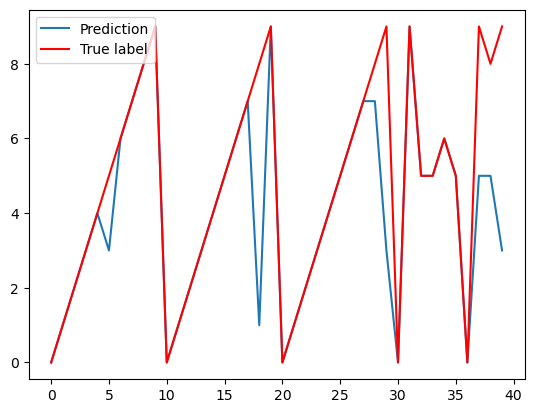

In [21]:
plt.plot(np.argmax(model.predict(X_train[0:40,:]),axis=1),label = 'Prediction')
plt.plot(y_train[0:40],color='r',label='True label')
plt.legend()

In [22]:
model.evaluate(X_train,  oh_y_train.numpy(), verbose=2)

2023-08-26 19:20:17.008227: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


57/57 - 0s - loss: 0.0508 - accuracy: 0.8164 - 250ms/epoch - 4ms/step


[0.05081924796104431, 0.816360592842102]

## Deep learning ... deep problems

### PROBLEM 1: Dead neurons and vanishing gradients.

Let us add more layers. We will expect that we may learn even better.

In [23]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(100, activation="sigmoid"),
    tf.keras.layers.Dense(40, activation="sigmoid"),
    tf.keras.layers.Dense(40, activation="sigmoid"),
    tf.keras.layers.Dense(40, activation="sigmoid"),
    tf.keras.layers.Dense(10, activation="softmax")
])

model.compile(optimizer='sgd',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

oh_y_train = tf.one_hot(y_train, 10)

model.fit(X_train, oh_y_train.numpy(), epochs=750, batch_size = 32)

Epoch 1/750


2023-08-26 19:22:04.189028: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


57/57 [==============================] - 1s 9ms/step - loss: 2.3917 - accuracy: 0.0968
Epoch 2/750
57/57 [==============================] - 1s 9ms/step - loss: 2.3254 - accuracy: 0.0924
Epoch 3/750
57/57 [==============================] - 1s 9ms/step - loss: 2.3099 - accuracy: 0.0851
Epoch 4/750
57/57 [==============================] - 1s 9ms/step - loss: 2.3056 - accuracy: 0.0940
Epoch 5/750
57/57 [==============================] - 1s 9ms/step - loss: 2.3046 - accuracy: 0.0907
Epoch 6/750
57/57 [==============================] - 1s 9ms/step - loss: 2.3043 - accuracy: 0.0979
Epoch 7/750
57/57 [==============================] - 1s 9ms/step - loss: 2.3042 - accuracy: 0.0824
Epoch 8/750
57/57 [==============================] - 1s 9ms/step - loss: 2.3043 - accuracy: 0.0857
Epoch 9/750
57/57 [==============================] - 1s 9ms/step - loss: 2.3041 - accuracy: 0.0885
Epoch 10/750
57/57 [==============================] - 1s 9ms/step - loss: 2.3042 - accuracy: 0.0940
Epoch 11/750
57/57 [=

57/57 [==============================] - 0s 9ms/step - loss: 2.3032 - accuracy: 0.0991
Epoch 165/750
57/57 [==============================] - 1s 9ms/step - loss: 2.3030 - accuracy: 0.1057
Epoch 166/750
57/57 [==============================] - 0s 9ms/step - loss: 2.3030 - accuracy: 0.1068
Epoch 167/750
57/57 [==============================] - 1s 9ms/step - loss: 2.3029 - accuracy: 0.0940
Epoch 168/750
57/57 [==============================] - 0s 9ms/step - loss: 2.3030 - accuracy: 0.0974
Epoch 169/750
57/57 [==============================] - 1s 9ms/step - loss: 2.3032 - accuracy: 0.1013
Epoch 170/750
57/57 [==============================] - 1s 9ms/step - loss: 2.3029 - accuracy: 0.0991
Epoch 171/750
57/57 [==============================] - 1s 9ms/step - loss: 2.3031 - accuracy: 0.0940
Epoch 172/750
57/57 [==============================] - 1s 9ms/step - loss: 2.3030 - accuracy: 0.0896
Epoch 173/750
57/57 [==============================] - 0s 9ms/step - loss: 2.3027 - accuracy: 0.1057
Epoc

57/57 [==============================] - 0s 9ms/step - loss: 2.3013 - accuracy: 0.1163
Epoch 327/750
57/57 [==============================] - 0s 9ms/step - loss: 2.3014 - accuracy: 0.1007
Epoch 328/750
57/57 [==============================] - 1s 9ms/step - loss: 2.3014 - accuracy: 0.1174
Epoch 329/750
57/57 [==============================] - 1s 9ms/step - loss: 2.3013 - accuracy: 0.1163
Epoch 330/750
57/57 [==============================] - 0s 9ms/step - loss: 2.3015 - accuracy: 0.1068
Epoch 331/750
57/57 [==============================] - 1s 9ms/step - loss: 2.3014 - accuracy: 0.1057
Epoch 332/750
57/57 [==============================] - 1s 9ms/step - loss: 2.3014 - accuracy: 0.1085
Epoch 333/750
57/57 [==============================] - 1s 9ms/step - loss: 2.3014 - accuracy: 0.1035
Epoch 334/750
57/57 [==============================] - 1s 9ms/step - loss: 2.3014 - accuracy: 0.1068
Epoch 335/750
57/57 [==============================] - 1s 9ms/step - loss: 2.3014 - accuracy: 0.1080
Epoc

57/57 [==============================] - 1s 9ms/step - loss: 2.2983 - accuracy: 0.1375
Epoch 489/750
57/57 [==============================] - 1s 9ms/step - loss: 2.2985 - accuracy: 0.1280
Epoch 490/750
57/57 [==============================] - 0s 9ms/step - loss: 2.2983 - accuracy: 0.1269
Epoch 491/750
57/57 [==============================] - 0s 9ms/step - loss: 2.2982 - accuracy: 0.1352
Epoch 492/750
57/57 [==============================] - 1s 9ms/step - loss: 2.2982 - accuracy: 0.1297
Epoch 493/750
57/57 [==============================] - 0s 9ms/step - loss: 2.2979 - accuracy: 0.1319
Epoch 494/750
57/57 [==============================] - 0s 9ms/step - loss: 2.2982 - accuracy: 0.1330
Epoch 495/750
57/57 [==============================] - 1s 9ms/step - loss: 2.2981 - accuracy: 0.1247
Epoch 496/750
57/57 [==============================] - 1s 9ms/step - loss: 2.2979 - accuracy: 0.1324
Epoch 497/750
57/57 [==============================] - 0s 9ms/step - loss: 2.2980 - accuracy: 0.1107
Epoc

57/57 [==============================] - 1s 9ms/step - loss: 2.2844 - accuracy: 0.1747
Epoch 651/750
57/57 [==============================] - 1s 9ms/step - loss: 2.2843 - accuracy: 0.2098
Epoch 652/750
57/57 [==============================] - 0s 9ms/step - loss: 2.2839 - accuracy: 0.2877
Epoch 653/750
57/57 [==============================] - 1s 9ms/step - loss: 2.2837 - accuracy: 0.2309
Epoch 654/750
57/57 [==============================] - 0s 9ms/step - loss: 2.2835 - accuracy: 0.2771
Epoch 655/750
57/57 [==============================] - 1s 9ms/step - loss: 2.2835 - accuracy: 0.2115
Epoch 656/750
57/57 [==============================] - 0s 9ms/step - loss: 2.2829 - accuracy: 0.2142
Epoch 657/750
57/57 [==============================] - 1s 9ms/step - loss: 2.2826 - accuracy: 0.2465
Epoch 658/750
57/57 [==============================] - 0s 9ms/step - loss: 2.2826 - accuracy: 0.2410
Epoch 659/750
57/57 [==============================] - 0s 9ms/step - loss: 2.2821 - accuracy: 0.2176
Epoc

2/2 [==============================] - 0s 13ms/step


2023-08-26 19:28:23.799450: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


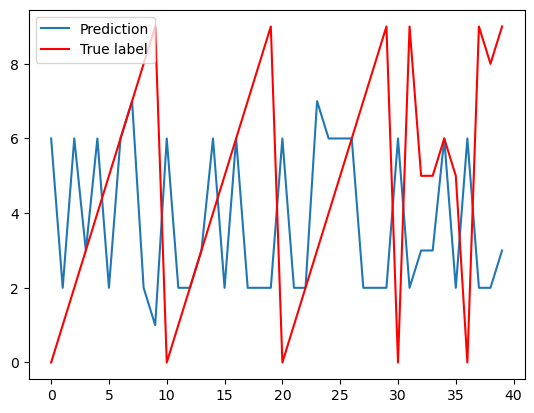

In [24]:
plt.plot(np.argmax(model.predict(X_train[0:40,:]),axis=1),label = 'Prediction')
plt.plot(y_train[0:40],color='r',label='True label')
plt.legend()

In [25]:
model.evaluate(X_train,  oh_y_train.numpy(), verbose=2)

2023-08-26 19:28:23.962697: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


57/57 - 0s - loss: 2.1381 - accuracy: 0.3094 - 466ms/epoch - 8ms/step


[2.1380646228790283, 0.30940455198287964]

<div class = "alert alert-danger" style = "border-radius:10px;border-width:3px"><b> Question:</b>What is wrong??????</div>



The problem lays in the neuron model and its working regime. This gives rise to the problem of  of **vanishing gradients** and **dead neurons** when learning the network. A simple way of solving this problem is to let the neuron model output to grow indefinitely on one side. The simplest model is the **Rectified Linear Unit**, i.e.

$$relu(x) = \max(0,x)$$



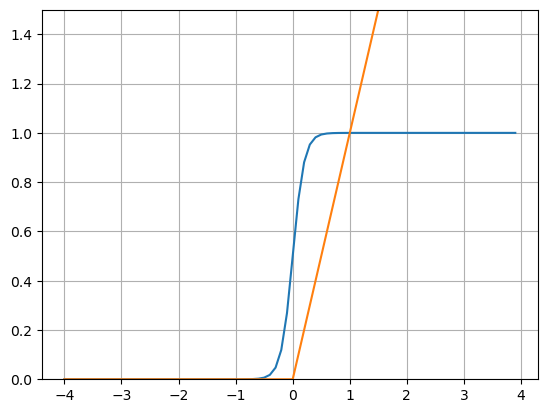

In [26]:
x = np.arange(-4,4,0.1)
rel = tf.nn.relu(x)

plt.plot(x,sig.numpy())
plt.plot(x,rel.numpy()) 
ax = plt.gca()
ax.set_ylim(0,1.5)
plt.grid('on')

Let us replace the activation with **ReLU**.

In [27]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(100, activation="relu"),
    tf.keras.layers.Dense(40, activation="relu"),
    tf.keras.layers.Dense(40, activation="relu"),
    tf.keras.layers.Dense(40, activation="relu"),
    tf.keras.layers.Dense(10, activation="softmax")
])

model.compile(optimizer='sgd',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

oh_y_train = tf.one_hot(y_train, 10)

model.fit(X_train, oh_y_train.numpy(), epochs=750, batch_size = 32)

Epoch 1/750
 7/57 [==>...........................] - ETA: 0s - loss: 2.4706 - accuracy: 0.0848 

2023-08-26 19:30:29.059378: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


57/57 [==============================] - 1s 9ms/step - loss: 2.3305 - accuracy: 0.0907
Epoch 2/750
57/57 [==============================] - 1s 9ms/step - loss: 2.1016 - accuracy: 0.1998
Epoch 3/750
57/57 [==============================] - 0s 9ms/step - loss: 1.9067 - accuracy: 0.3088
Epoch 4/750
57/57 [==============================] - 1s 9ms/step - loss: 1.7118 - accuracy: 0.4363
Epoch 5/750
57/57 [==============================] - 1s 9ms/step - loss: 1.5071 - accuracy: 0.5715
Epoch 6/750
57/57 [==============================] - 1s 9ms/step - loss: 1.2955 - accuracy: 0.6761
Epoch 7/750
57/57 [==============================] - 1s 9ms/step - loss: 1.0938 - accuracy: 0.7546
Epoch 8/750
57/57 [==============================] - 1s 9ms/step - loss: 0.9145 - accuracy: 0.7974
Epoch 9/750
57/57 [==============================] - 1s 9ms/step - loss: 0.7645 - accuracy: 0.8253
Epoch 10/750
57/57 [==============================] - 1s 9ms/step - loss: 0.6415 - accuracy: 0.8520
Epoch 11/750
57/57 [=

57/57 [==============================] - 1s 9ms/step - loss: 0.0304 - accuracy: 0.9922
Epoch 165/750
57/57 [==============================] - 0s 9ms/step - loss: 0.0290 - accuracy: 0.9950
Epoch 166/750
57/57 [==============================] - 0s 9ms/step - loss: 0.0288 - accuracy: 0.9917
Epoch 167/750
57/57 [==============================] - 0s 9ms/step - loss: 0.0308 - accuracy: 0.9917
Epoch 168/750
57/57 [==============================] - 0s 9ms/step - loss: 0.0282 - accuracy: 0.9928
Epoch 169/750
57/57 [==============================] - 0s 9ms/step - loss: 0.0273 - accuracy: 0.9944
Epoch 170/750
57/57 [==============================] - 0s 9ms/step - loss: 0.0302 - accuracy: 0.9894
Epoch 171/750
57/57 [==============================] - 0s 9ms/step - loss: 0.0281 - accuracy: 0.9933
Epoch 172/750
57/57 [==============================] - 0s 9ms/step - loss: 0.0276 - accuracy: 0.9939
Epoch 173/750
57/57 [==============================] - 0s 9ms/step - loss: 0.0257 - accuracy: 0.9950
Epoc

57/57 [==============================] - 0s 9ms/step - loss: 0.0072 - accuracy: 0.9994
Epoch 327/750
57/57 [==============================] - 0s 9ms/step - loss: 0.0072 - accuracy: 0.9994
Epoch 328/750
57/57 [==============================] - 0s 9ms/step - loss: 0.0072 - accuracy: 0.9994
Epoch 329/750
57/57 [==============================] - 0s 9ms/step - loss: 0.0073 - accuracy: 0.9994
Epoch 330/750
57/57 [==============================] - 0s 9ms/step - loss: 0.0076 - accuracy: 0.9994
Epoch 331/750
57/57 [==============================] - 0s 9ms/step - loss: 0.0071 - accuracy: 0.9994
Epoch 332/750
57/57 [==============================] - 0s 9ms/step - loss: 0.0074 - accuracy: 0.9994
Epoch 333/750
57/57 [==============================] - 0s 9ms/step - loss: 0.0070 - accuracy: 0.9994
Epoch 334/750
57/57 [==============================] - 0s 9ms/step - loss: 0.0068 - accuracy: 1.0000
Epoch 335/750
57/57 [==============================] - 0s 9ms/step - loss: 0.0068 - accuracy: 1.0000
Epoc

57/57 [==============================] - 0s 9ms/step - loss: 0.0029 - accuracy: 1.0000
Epoch 489/750
57/57 [==============================] - 0s 9ms/step - loss: 0.0029 - accuracy: 1.0000
Epoch 490/750
57/57 [==============================] - 0s 9ms/step - loss: 0.0029 - accuracy: 1.0000
Epoch 491/750
57/57 [==============================] - 0s 9ms/step - loss: 0.0031 - accuracy: 1.0000
Epoch 492/750
57/57 [==============================] - 0s 9ms/step - loss: 0.0029 - accuracy: 1.0000
Epoch 493/750
57/57 [==============================] - 0s 9ms/step - loss: 0.0029 - accuracy: 1.0000
Epoch 494/750
57/57 [==============================] - 0s 9ms/step - loss: 0.0029 - accuracy: 1.0000
Epoch 495/750
57/57 [==============================] - 0s 9ms/step - loss: 0.0029 - accuracy: 1.0000
Epoch 496/750
57/57 [==============================] - 0s 9ms/step - loss: 0.0029 - accuracy: 1.0000
Epoch 497/750
57/57 [==============================] - 0s 9ms/step - loss: 0.0028 - accuracy: 1.0000
Epoc

57/57 [==============================] - 1s 9ms/step - loss: 0.0017 - accuracy: 1.0000
Epoch 651/750
57/57 [==============================] - 0s 9ms/step - loss: 0.0016 - accuracy: 1.0000
Epoch 652/750
57/57 [==============================] - 1s 9ms/step - loss: 0.0016 - accuracy: 1.0000
Epoch 653/750
57/57 [==============================] - 0s 9ms/step - loss: 0.0016 - accuracy: 1.0000
Epoch 654/750
57/57 [==============================] - 0s 9ms/step - loss: 0.0016 - accuracy: 1.0000
Epoch 655/750
57/57 [==============================] - 0s 9ms/step - loss: 0.0016 - accuracy: 1.0000
Epoch 656/750
57/57 [==============================] - 0s 9ms/step - loss: 0.0016 - accuracy: 1.0000
Epoch 657/750
57/57 [==============================] - 0s 9ms/step - loss: 0.0016 - accuracy: 1.0000
Epoch 658/750
57/57 [==============================] - 0s 9ms/step - loss: 0.0016 - accuracy: 1.0000
Epoch 659/750
57/57 [==============================] - 0s 9ms/step - loss: 0.0016 - accuracy: 1.0000
Epoc

2/2 [==============================] - 0s 4ms/step


2023-08-26 19:36:44.672154: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


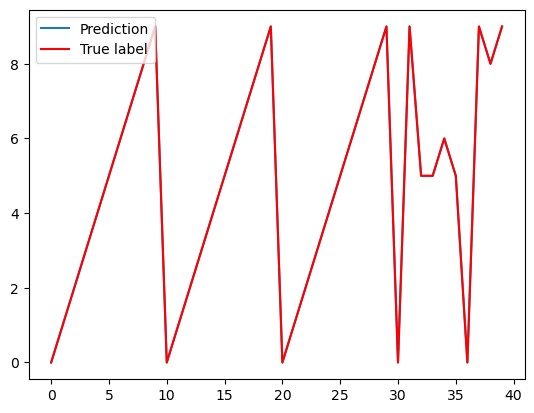

In [28]:
plt.plot(np.argmax(model.predict(X_train[0:40,:]),axis=1),label = 'Prediction')
plt.plot(y_train[0:40],color='r',label='True label')
plt.legend()

In [29]:
model.evaluate(X_train,  oh_y_train.numpy(), verbose=2)

2023-08-26 19:36:44.816301: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


57/57 - 0s - loss: 0.0012 - accuracy: 1.0000 - 448ms/epoch - 8ms/step


[0.0012266193516552448, 1.0]



<div class = "alert alert-info" style = "border-radius:10px;border-width:3px"> 
<b>TAKE HOME IDEA:</b>    

There are different non-linear activations that can be used to address the challenges of dead neurons and vanishing gradients, such as ReLU, SeLU, Leaky ReLU, etc. These units are important because they allow the signal to flow forward and the gradient to flow backwards.

</div>



### PROBLEM 2: Internal covariate shift

and we are very HAPPY and try even more deep models!!!!!

In [51]:
tf.keras.backend.clear_session()

model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(100, activation="relu"),
    tf.keras.layers.Dense(40, activation="relu"),
    tf.keras.layers.Dense(20, activation="relu"),
    tf.keras.layers.Dense(10, activation="relu"),
    tf.keras.layers.Dense(10, activation="relu"),
    tf.keras.layers.Dense(10, activation="relu"),
    tf.keras.layers.Dense(10, activation="relu"),
    tf.keras.layers.Dense(10, activation="relu"),
    tf.keras.layers.Dense(10, activation="relu"),
    tf.keras.layers.Dense(10, activation="relu"),
    tf.keras.layers.Dense(10, activation="relu"),
    tf.keras.layers.Dense(10, activation="relu"),
    tf.keras.layers.Dense(10, activation="relu"),
    tf.keras.layers.Dense(10, activation="softmax")
])



model.compile(optimizer='sgd',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

from keras import backend as K
K.set_value(model.optimizer.learning_rate, 0.001)

oh_y_train = tf.one_hot(y_train, 10)

model.fit(X_train, oh_y_train.numpy(), epochs=150, batch_size = 32)


Epoch 1/150


2023-08-26 20:14:27.670973: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


57/57 [==============================] - 2s 25ms/step - loss: 2.3247 - accuracy: 0.1018
Epoch 2/150
57/57 [==============================] - 1s 16ms/step - loss: 2.3229 - accuracy: 0.1018
Epoch 3/150
57/57 [==============================] - 1s 16ms/step - loss: 2.3215 - accuracy: 0.1024
Epoch 4/150
57/57 [==============================] - 1s 16ms/step - loss: 2.3200 - accuracy: 0.1024
Epoch 5/150
57/57 [==============================] - 1s 15ms/step - loss: 2.3188 - accuracy: 0.1024
Epoch 6/150
57/57 [==============================] - 1s 15ms/step - loss: 2.3178 - accuracy: 0.1018
Epoch 7/150
57/57 [==============================] - 1s 16ms/step - loss: 2.3168 - accuracy: 0.1018
Epoch 8/150
57/57 [==============================] - 1s 15ms/step - loss: 2.3158 - accuracy: 0.1013
Epoch 9/150
57/57 [==============================] - 1s 15ms/step - loss: 2.3148 - accuracy: 0.1013
Epoch 10/150
57/57 [==============================] - 1s 15ms/step - loss: 2.3139 - accuracy: 0.1013
Epoch 11/15

2/2 [==============================] - 0s 75ms/step


2023-08-26 20:16:39.962729: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


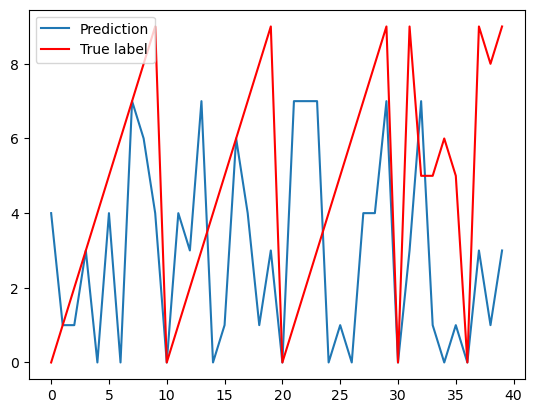

In [52]:
plt.plot(np.argmax(model.predict(X_train[0:40,:]),axis=1),label = 'Prediction')
plt.plot(y_train[0:40],color='r',label='True label')
plt.legend()

In [53]:
model.evaluate(X_train,  oh_y_train.numpy(), verbose=2)

2023-08-26 20:16:40.204650: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


57/57 - 1s - loss: 2.1631 - accuracy: 0.2482 - 750ms/epoch - 13ms/step


[2.163111925125122, 0.24819143116474152]

<div class = "alert alert-danger" style = "border-radius:10px;border-width:3px"><b> Question:</b> WHAT?????? WHY???? Didn't we just solved the problem?</div>



In [54]:
tf.keras.backend.clear_session()


inputs = tf.keras.Input(shape=(64,))
x = tf.keras.layers.Dense(100, activation="relu")(inputs)
x = tf.keras.layers.BatchNormalization()(x)
x = tf.keras.layers.Dense(40, activation="relu")(x)
x = tf.keras.layers.BatchNormalization()(x)
x = tf.keras.layers.Dense(20, activation="relu")(x)
x = tf.keras.layers.BatchNormalization()(x)
x = tf.keras.layers.Dense(10, activation="relu")(x)
x = tf.keras.layers.BatchNormalization()(x)
x = tf.keras.layers.Dense(10, activation="relu")(x)
x = tf.keras.layers.BatchNormalization()(x)
x = tf.keras.layers.Dense(10, activation="relu")(x)
x = tf.keras.layers.BatchNormalization()(x)
x = tf.keras.layers.Dense(10, activation="relu")(x)
x = tf.keras.layers.BatchNormalization()(x)
x = tf.keras.layers.Dense(10, activation="relu")(x)
x = tf.keras.layers.BatchNormalization()(x)
x = tf.keras.layers.Dense(10, activation="relu")(x)
x = tf.keras.layers.BatchNormalization()(x)
x = tf.keras.layers.Dense(10, activation="relu")(x)
x = tf.keras.layers.BatchNormalization()(x)
x = tf.keras.layers.Dense(10, activation="relu")(x)
x = tf.keras.layers.BatchNormalization()(x)
x = tf.keras.layers.Dense(10, activation="relu")(x)
x = tf.keras.layers.BatchNormalization()(x)
x = tf.keras.layers.Dense(10, activation="relu")(x)
outputs = tf.keras.layers.Dense(10, activation="softmax")(x)

model = tf.keras.Model(inputs=inputs, outputs=outputs)

model.compile(optimizer='sgd',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

from keras import backend as K
K.set_value(model.optimizer.learning_rate, 0.001)

oh_y_train = tf.one_hot(y_train, 10)

model.fit(X_train, oh_y_train.numpy(), epochs=150, batch_size = 32)

Epoch 1/150


2023-08-26 20:16:41.685425: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


57/57 [==============================] - 7s 83ms/step - loss: 2.6278 - accuracy: 0.0807
Epoch 2/150
57/57 [==============================] - 2s 39ms/step - loss: 2.5668 - accuracy: 0.0868
Epoch 3/150
57/57 [==============================] - 2s 37ms/step - loss: 2.5127 - accuracy: 0.0907
Epoch 4/150
57/57 [==============================] - 2s 38ms/step - loss: 2.4846 - accuracy: 0.0979
Epoch 5/150
57/57 [==============================] - 2s 44ms/step - loss: 2.4342 - accuracy: 0.1102
Epoch 6/150
57/57 [==============================] - 2s 38ms/step - loss: 2.4049 - accuracy: 0.1297
Epoch 7/150
57/57 [==============================] - 2s 37ms/step - loss: 2.3700 - accuracy: 0.1358
Epoch 8/150
57/57 [==============================] - 2s 38ms/step - loss: 2.3342 - accuracy: 0.1486
Epoch 9/150
57/57 [==============================] - 3s 48ms/step - loss: 2.3190 - accuracy: 0.1569
Epoch 10/150
57/57 [==============================] - 2s 41ms/step - loss: 2.2875 - accuracy: 0.1630
Epoch 11/15

2023-08-26 20:22:08.984292: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


2/2 [==============================] - 1s 140ms/step


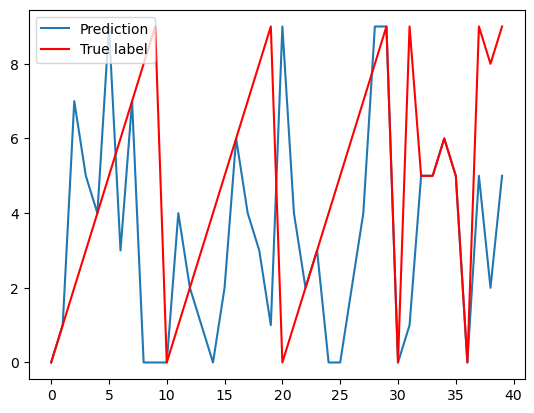

In [55]:
plt.plot(np.argmax(model.predict(X_train[0:40,:]),axis=1),label = 'Prediction')
plt.plot(y_train[0:40],color='r',label='True label')
plt.legend()

In [56]:
model.evaluate(X_train,  oh_y_train.numpy(), verbose=2)

2023-08-26 20:22:09.778464: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


57/57 - 2s - loss: 1.6450 - accuracy: 0.4402 - 2s/epoch - 31ms/step


[1.644953966140747, 0.4401780664920807]

In [57]:
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 64)]              0         
                                                                 
 dense (Dense)               (None, 100)               6500      
                                                                 
 batch_normalization (Batch  (None, 100)               400       
 Normalization)                                                  
                                                                 
 dense_1 (Dense)             (None, 40)                4040      
                                                                 
 batch_normalization_1 (Bat  (None, 40)                160       
 chNormalization)                                                
                                                                 
 dense_2 (Dense)             (None, 20)                820   

In [58]:
from tensorflow.keras import backend as K

# with a Sequential model
inp = model.input  
get_1st_output = K.function(inp,[model.layers[1].output])
layer_output = get_1st_output(X_train)

(array([  4.,   9.,  19.,  43.,  53., 102., 136., 162., 155., 171., 155.,
        164., 125., 108., 111.,  71.,  56.,  44.,  25.,  27.,  14.,  10.,
         14.,  11.,   6.,   0.,   0.,   1.,   0.,   1.]),
 array([2.29875685, 2.52231977, 2.7458827 , 2.96944562, 3.19300855,
        3.41657148, 3.6401344 , 3.86369733, 4.08726025, 4.31082318,
        4.53438611, 4.75794903, 4.98151196, 5.20507488, 5.42863781,
        5.65220074, 5.87576366, 6.09932659, 6.32288951, 6.54645244,
        6.77001537, 6.99357829, 7.21714122, 7.44070414, 7.66426707,
        7.88783   , 8.11139292, 8.33495585, 8.55851877, 8.7820817 ,
        9.00564463]),
 <BarContainer object of 30 artists>)

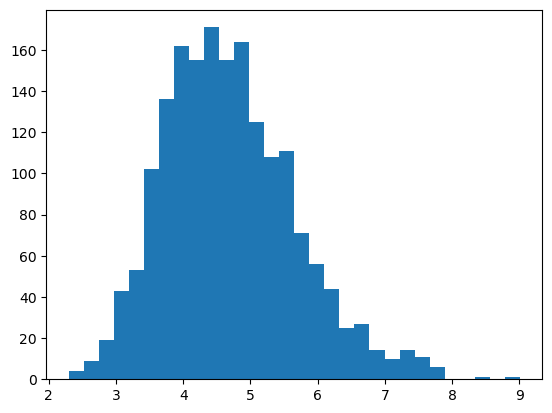

In [59]:
m = np.mean(X_train,axis=0)
plt.hist(np.sum(np.power(X_train-np.tile(m,(X_train.shape[0],1)),2),axis=1),bins=30)

In [60]:
layer_output

[array([[0.33360657, 0.12306773, 0.        , ..., 0.        , 0.        ,
         0.        ],
        [0.        , 0.        , 0.38709322, ..., 0.        , 0.        ,
         0.        ],
        [0.13428311, 0.        , 0.        , ..., 0.        , 0.        ,
         0.03670179],
        ...,
        [0.301713  , 0.        , 0.0117862 , ..., 0.        , 0.        ,
         0.        ],
        [0.5229858 , 0.        , 0.34183598, ..., 0.        , 0.        ,
         0.        ],
        [0.55255914, 0.        , 0.04740868, ..., 0.        , 0.        ,
         0.        ]], dtype=float32)]

(array([  4.,   8.,  28.,  52., 101., 140., 173., 194., 184., 211., 175.,
        136., 107.,  82.,  65.,  46.,  29.,  20.,   9.,   8.,   7.,   5.,
          5.,   3.,   1.,   2.,   0.,   0.,   0.,   2.]),
 array([0.7577129 , 0.87977248, 1.00183201, 1.12389159, 1.24595118,
        1.36801076, 1.49007034, 1.61212981, 1.73418939, 1.85624897,
        1.97830856, 2.10036802, 2.22242761, 2.34448719, 2.46654677,
        2.58860636, 2.71066594, 2.83272552, 2.95478511, 3.07684469,
        3.19890428, 3.32096386, 3.44302344, 3.56508303, 3.68714237,
        3.80920196, 3.93126154, 4.05332136, 4.17538071, 4.29744053,
        4.41949987]),
 <BarContainer object of 30 artists>)

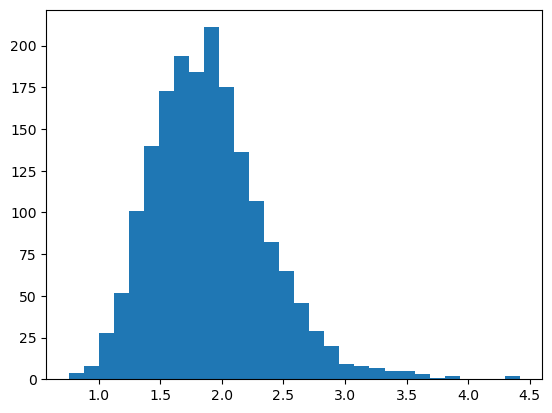

In [61]:
m = np.mean(layer_output[0],axis=0)
plt.hist(np.sum(np.power(layer_output[0]-np.tile(m,(X_train.shape[0],1)),2),axis=1),bins=30)

In [62]:
from tensorflow.keras import backend as K

# with a Sequential model
inp = model.input  
get_batch_output = K.function(inp,[model.layers[2].output])
batch_output = get_batch_output(X_train)

(array([  6.,  10.,  30.,  54., 133., 145., 196., 209., 199., 209., 146.,
        124., 100.,  78.,  44.,  36.,  26.,  15.,  12.,   7.,   8.,   1.,
          2.,   2.,   3.,   0.,   0.,   0.,   0.,   2.]),
 array([14.84442329, 17.25862694, 19.67283058, 22.08703423, 24.50123787,
        26.91544342, 29.32964706, 31.74385071, 34.15805435, 36.572258  ,
        38.98646164, 41.40066528, 43.81486893, 46.22907257, 48.64327621,
        51.05747986, 53.4716835 , 55.88588715, 58.30009079, 60.71429443,
        63.12850189, 65.54270172, 67.95690918, 70.37110901, 72.78531647,
        75.1995163 , 77.61372375, 80.02792358, 82.44213104, 84.85633087,
        87.27053833]),
 <BarContainer object of 30 artists>)

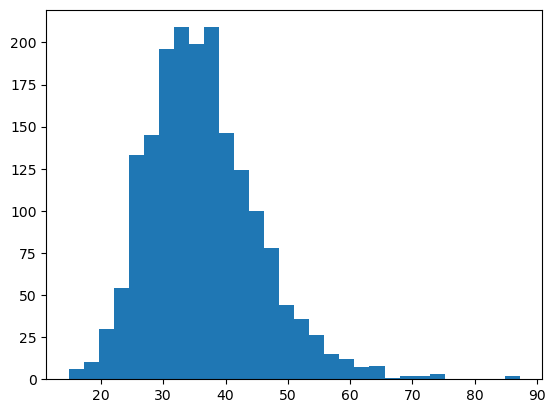

In [63]:
m = np.mean(batch_output[0],axis=0)
plt.hist(np.sum(np.power(batch_output[0]-np.tile(m,(X_train.shape[0],1)),2),axis=1),bins=30)

Sooooo... if we reset statistics can ```sigmoid``` work? **YES!!!!**

Let's check it...

In [99]:
import tensorflow as tf
tf.keras.backend.clear_session()


inputs = tf.keras.Input(shape=(64,))
x = tf.keras.layers.Dense(100, activation="sigmoid")(inputs)
x = tf.keras.layers.BatchNormalization()(x)
x = tf.keras.layers.Dense(40, activation="sigmoid")(x)
x = tf.keras.layers.BatchNormalization()(x)
x = tf.keras.layers.Dense(20, activation="sigmoid")(x)
x = tf.keras.layers.BatchNormalization()(x)
x = tf.keras.layers.Dense(10, activation="sigmoid")(x)
x = tf.keras.layers.BatchNormalization()(x)
x = tf.keras.layers.Dense(10, activation="sigmoid")(x)
x = tf.keras.layers.BatchNormalization()(x)
x = tf.keras.layers.Dense(10, activation="sigmoid")(x)
x = tf.keras.layers.BatchNormalization()(x)
x = tf.keras.layers.Dense(10, activation="sigmoid")(x)
x = tf.keras.layers.BatchNormalization()(x)
x = tf.keras.layers.Dense(10, activation="sigmoid")(x)
x = tf.keras.layers.BatchNormalization()(x)
x = tf.keras.layers.Dense(10, activation="sigmoid")(x)
x = tf.keras.layers.BatchNormalization()(x)
x = tf.keras.layers.Dense(10, activation="sigmoid")(x)
x = tf.keras.layers.BatchNormalization()(x)
x = tf.keras.layers.Dense(10, activation="sigmoid")(x)
x = tf.keras.layers.BatchNormalization()(x)
x = tf.keras.layers.Dense(10, activation="sigmoid")(x)
x = tf.keras.layers.BatchNormalization()(x)
x = tf.keras.layers.Dense(10, activation="sigmoid")(x)

outputs = tf.keras.layers.Dense(10, activation="softmax")(x)

model = tf.keras.Model(inputs=inputs, outputs=outputs)

model.compile(optimizer='sgd',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

from keras import backend as K
K.set_value(model.optimizer.learning_rate, 0.001)
oh_y_train = tf.one_hot(y_train, 10)

model.fit(X_train, oh_y_train.numpy(), epochs=150, batch_size = 32)

Epoch 1/150


2023-08-27 15:51:07.828840: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


29/29 [==============================] - 3s 77ms/step - loss: 2.5651 - accuracy: 0.1448
Epoch 2/150
29/29 [==============================] - 1s 25ms/step - loss: 2.5315 - accuracy: 0.1615
Epoch 3/150
29/29 [==============================] - 1s 22ms/step - loss: 2.5006 - accuracy: 0.1626
Epoch 4/150
29/29 [==============================] - 1s 24ms/step - loss: 2.4705 - accuracy: 0.1682
Epoch 5/150
29/29 [==============================] - 1s 25ms/step - loss: 2.4391 - accuracy: 0.1804
Epoch 6/150
29/29 [==============================] - 1s 28ms/step - loss: 2.4095 - accuracy: 0.1837
Epoch 7/150
29/29 [==============================] - 1s 27ms/step - loss: 2.3803 - accuracy: 0.1882
Epoch 8/150
29/29 [==============================] - 1s 26ms/step - loss: 2.3522 - accuracy: 0.1982
Epoch 9/150
29/29 [==============================] - 1s 25ms/step - loss: 2.3266 - accuracy: 0.2138
Epoch 10/150
29/29 [==============================] - 1s 25ms/step - loss: 2.2970 - accuracy: 0.2138
Epoch 11/15

KeyboardInterrupt: 

2023-08-26 20:29:02.529214: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


2/2 [==============================] - 1s 146ms/step


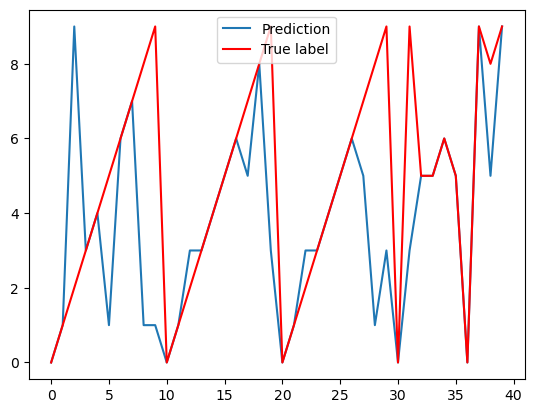

In [65]:
plt.plot(np.argmax(model.predict(X_train[0:40,:]),axis=1),label = 'Prediction')
plt.plot(y_train[0:40],color='r',label='True label')
plt.legend()

In [66]:
model.evaluate(X_train,  oh_y_train.numpy(), verbose=2)

2023-08-26 20:29:03.397516: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


57/57 - 2s - loss: 1.5620 - accuracy: 0.6839 - 2s/epoch - 36ms/step


[1.5619515180587769, 0.6839176416397095]

## Errrrr ... btw, all the process was wrong! Where is training and test????

In [88]:
from sklearn.datasets import load_digits
import numpy as np

from sklearn.model_selection import train_test_split

data=load_digits()
X = data.data/16.
y = data.target

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.5,random_state=42)

In [100]:
tf.keras.backend.clear_session()


inputs = tf.keras.Input(shape=(64,))
x = tf.keras.layers.Dense(100, activation="relu")(inputs)
x = tf.keras.layers.BatchNormalization()(x)
x = tf.keras.layers.Dense(40, activation="relu")(x)
x = tf.keras.layers.BatchNormalization()(x)
x = tf.keras.layers.Dense(40, activation="relu")(x)
x = tf.keras.layers.BatchNormalization()(x)
x = tf.keras.layers.Dense(40, activation="relu")(x)
x = tf.keras.layers.BatchNormalization()(x)
x = tf.keras.layers.Dense(40, activation="relu")(x)
x = tf.keras.layers.BatchNormalization()(x)
x = tf.keras.layers.Dense(40, activation="relu")(x)
outputs = tf.keras.layers.Dense(10, activation="softmax")(x)

model = tf.keras.Model(inputs=inputs, outputs=outputs)

model.compile(optimizer='sgd',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

from keras import backend as K
K.set_value(model.optimizer.learning_rate, 0.001)

oh_y_train = tf.one_hot(y_train, 10)

model.fit(X_train, oh_y_train.numpy(), epochs=150, batch_size = 32)

Epoch 1/150


2023-08-27 15:52:31.383465: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


29/29 [==============================] - 4s 84ms/step - loss: 3.1006 - accuracy: 0.0679
Epoch 2/150
29/29 [==============================] - 1s 49ms/step - loss: 2.9499 - accuracy: 0.0724
Epoch 3/150
29/29 [==============================] - 1s 29ms/step - loss: 2.8189 - accuracy: 0.0913
Epoch 4/150
29/29 [==============================] - 1s 25ms/step - loss: 2.6968 - accuracy: 0.1047
Epoch 5/150
29/29 [==============================] - 1s 28ms/step - loss: 2.5913 - accuracy: 0.1114
Epoch 6/150
29/29 [==============================] - 1s 26ms/step - loss: 2.4685 - accuracy: 0.1492
Epoch 7/150
29/29 [==============================] - 1s 25ms/step - loss: 2.3609 - accuracy: 0.1648
Epoch 8/150
29/29 [==============================] - 1s 24ms/step - loss: 2.2829 - accuracy: 0.1726
Epoch 9/150
29/29 [==============================] - 1s 28ms/step - loss: 2.2011 - accuracy: 0.2116
Epoch 10/150
29/29 [==============================] - 1s 25ms/step - loss: 2.1248 - accuracy: 0.2249
Epoch 11/15

2023-08-27 15:55:18.432640: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


2/2 [==============================] - 0s 93ms/step


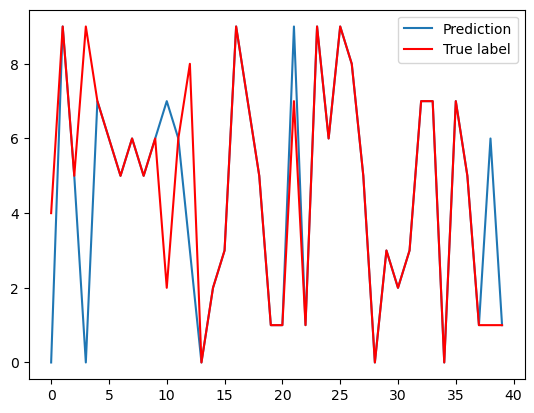

In [101]:
plt.plot(np.argmax(model.predict(X_train[0:40,:]),axis=1),label = 'Prediction')
plt.plot(y_train[0:40],color='r',label='True label')
plt.legend()

2/2 [==============================] - 0s 17ms/step


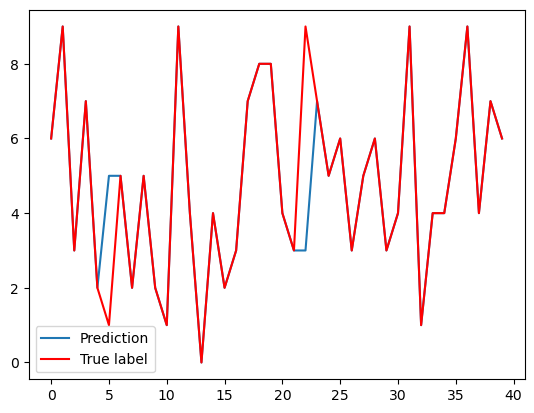

In [102]:
plt.plot(np.argmax(model.predict(X_test[0:40,:]),axis=1),label = 'Prediction')
plt.plot(y_test[0:40],color='r',label='True label')
plt.legend()

In [103]:
model.evaluate(X_train,  oh_y_train, verbose=2)

2023-08-27 15:55:22.042723: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


29/29 - 1s - loss: 0.4980 - accuracy: 0.8597 - 1s/epoch - 37ms/step


[0.4980206787586212, 0.8596882224082947]

In [104]:
oh_y_test = tf.one_hot(y_test, 10)

model.evaluate(X_test,  oh_y_test, verbose=2)

29/29 - 1s - loss: 0.5178 - accuracy: 0.8576 - 507ms/epoch - 17ms/step


[0.5177960395812988, 0.85761958360672]

You are making me crazy... now what!!!!!!!!



<div class = "alert alert-warning" style = "border-radius:10px;border-width:3px"> 
<b>TAKE HOME IDEA:</b>    

I am sure you know about PAC learning and concentration of measure inequalities and the trade-off between complexity and number of samples. In this case, we have very few samples. How can we synthetically "augment data". Enter the dragon! ... ops... Enter the <b>dropout</b>!

</div>



In [105]:
tf.keras.backend.clear_session()


inputs = tf.keras.Input(shape=(64,))
x = tf.keras.layers.Dropout(0.2)(inputs)
x = tf.keras.layers.Dense(100, activation="relu")(inputs)
x = tf.keras.layers.BatchNormalization()(x)
x = tf.keras.layers.Dense(40, activation="relu")(x)
x = tf.keras.layers.BatchNormalization()(x)
x = tf.keras.layers.Dense(40, activation="relu")(x)
x = tf.keras.layers.BatchNormalization()(x)
x = tf.keras.layers.Dense(40, activation="relu")(x)
x = tf.keras.layers.BatchNormalization()(x)
x = tf.keras.layers.Dense(40, activation="relu")(x)
x = tf.keras.layers.BatchNormalization()(x)
x = tf.keras.layers.Dense(40, activation="relu")(x)
outputs = tf.keras.layers.Dense(10, activation="softmax")(x)

model = tf.keras.Model(inputs=inputs, outputs=outputs)

model.compile(optimizer='sgd',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

from keras import backend as K
K.set_value(model.optimizer.learning_rate, 0.001)

oh_y_train = tf.one_hot(y_train, 10)

model.fit(X_train, oh_y_train.numpy(), epochs=150, batch_size = 32)

Epoch 1/150


2023-08-27 15:55:28.936814: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


29/29 [==============================] - 4s 91ms/step - loss: 2.9053 - accuracy: 0.1114
Epoch 2/150
29/29 [==============================] - 1s 27ms/step - loss: 2.7775 - accuracy: 0.1269
Epoch 3/150
29/29 [==============================] - 1s 27ms/step - loss: 2.6552 - accuracy: 0.1437
Epoch 4/150
29/29 [==============================] - 1s 32ms/step - loss: 2.5226 - accuracy: 0.1748
Epoch 5/150
29/29 [==============================] - 1s 30ms/step - loss: 2.4197 - accuracy: 0.1982
Epoch 6/150
29/29 [==============================] - 1s 29ms/step - loss: 2.3448 - accuracy: 0.2171
Epoch 7/150
29/29 [==============================] - 1s 25ms/step - loss: 2.2479 - accuracy: 0.2461
Epoch 8/150
29/29 [==============================] - 1s 29ms/step - loss: 2.1686 - accuracy: 0.2494
Epoch 9/150
29/29 [==============================] - 1s 25ms/step - loss: 2.0990 - accuracy: 0.2706
Epoch 10/150
29/29 [==============================] - 1s 26ms/step - loss: 1.9993 - accuracy: 0.3207
Epoch 11/15

2023-08-27 15:58:44.918815: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


2/2 [==============================] - 0s 129ms/step


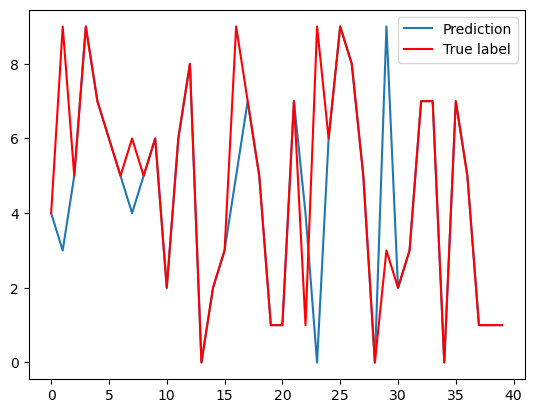

In [106]:
plt.plot(np.argmax(model.predict(X_train[0:40,:]),axis=1),label = 'Prediction')
plt.plot(y_train[0:40],color='r',label='True label')
plt.legend()

In [107]:
model.evaluate(X_train,  oh_y_train, verbose=2)

2023-08-27 15:58:45.816063: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


29/29 - 1s - loss: 0.5314 - accuracy: 0.8486 - 1s/epoch - 38ms/step


[0.5314154028892517, 0.8485523462295532]

2/2 [==============================] - 0s 5ms/step


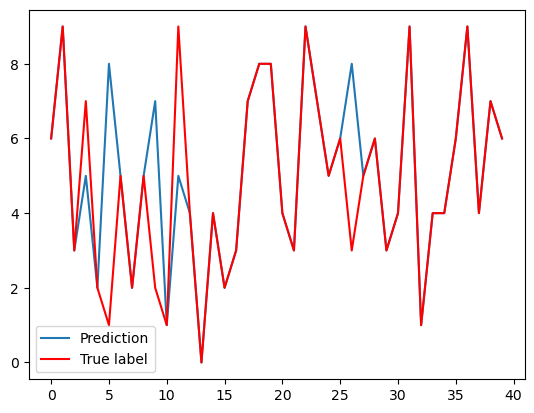

In [108]:
plt.plot(np.argmax(model.predict(X_test[0:40,:]),axis=1),label = 'Prediction')
plt.plot(y_test[0:40],color='r',label='True label')
plt.legend()

In [98]:
oh_y_test = tf.one_hot(y_test, 10)

model.evaluate(X_test,  oh_y_test, verbose=2)

29/29 - 1s - loss: 1.8002 - accuracy: 0.3571 - 699ms/epoch - 24ms/step


[1.8002188205718994, 0.3570634126663208]



<div class = "alert alert-warning" style = "border-radius:10px;border-width:3px"> 
<b>Oh my ... This is just AWESOME!!!!! We recovered some prediction power!!!!</b>    
</div>



## Interpreting deep learning as feature representations 



<div class = "alert alert-info" style = "border-radius:10px;border-width:3px"> 
<b>THE FINAL AND MOST IMPORTANT TAKE HOME IDEA:</b>    
    
Deep learning is all about learning representations. As a classifier it is a fiasco. But then... how does it work so well? Because all layers up to the last one can be interpreted as transformations of the data. And just the last layer is the classification step. For examples in the case of soft-max the decision boundary is linear. This is a really simple classifier, thus if the network is to work well the transformation must be such that a linear classifier is able to perform well enough.

<b>This is really what deep learning is about!</b>
</div>



Let us check this out. We will recover a relative ok classification such as the last model trained, slice the last layer, and replace it with a real classifier... and see what happens.

First, let us access the last layer representation:

In [58]:
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 64)]              0         
                                                                 
 dropout (Dropout)           (None, 64)                0         
                                                                 
 dense (Dense)               (None, 100)               6500      
                                                                 
 batch_normalization (BatchN  (None, 100)              400       
 ormalization)                                                   
                                                                 
 dense_1 (Dense)             (None, 40)                4040      
                                                                 
 batch_normalization_1 (Batc  (None, 40)               160       
 hNormalization)                                             

In [81]:
from tensorflow.keras import backend as K

# with a Sequential model
inp = model.input  
get_batch_output = K.function(inp,[model.layers[0].output])
batch_output = get_batch_output(X_train)

In [82]:
batch_output

[array([[0.    , 0.    , 0.    , ..., 0.375 , 0.    , 0.    ],
        [0.    , 0.    , 0.5625, ..., 0.375 , 0.    , 0.    ],
        [0.    , 0.0625, 0.5   , ..., 0.    , 0.    , 0.    ],
        ...,
        [0.    , 0.    , 0.5625, ..., 1.    , 0.125 , 0.    ],
        [0.    , 0.    , 0.0625, ..., 0.    , 0.    , 0.    ],
        [0.    , 0.    , 0.0625, ..., 0.0625, 0.    , 0.    ]],
       dtype=float32)]

In [83]:
from sklearn import ensemble

clf = ensemble.RandomForestClassifier(101)
clf.fit(batch_output[0],y_train)

RandomForestClassifier(n_estimators=101)

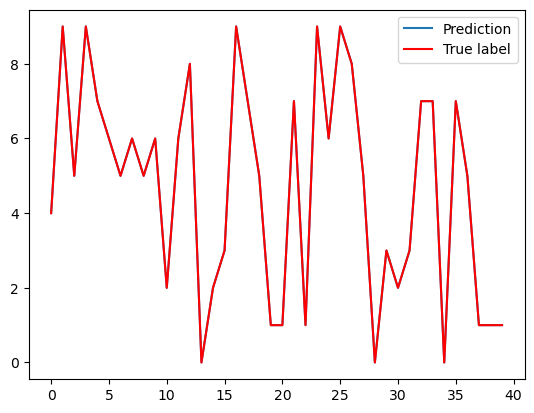

In [84]:
bo = batch_output[0]
plt.plot(clf.predict(bo[0:40,:]),label = 'Prediction')
plt.plot(y_train[0:40],color='r',label='True label')
plt.legend()

In [85]:
np.mean(np.where(np.abs(clf.predict(bo)-y_train)<1e-6,1.,0.))

1.0

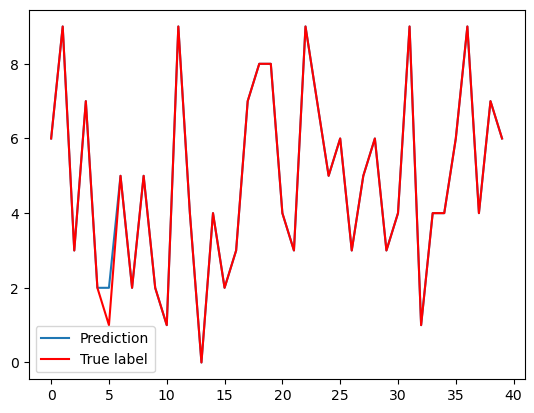

In [86]:
batch_output = get_batch_output(X_test)

bo = batch_output[0]
plt.plot(clf.predict(bo[0:40,:]),label = 'Prediction')
plt.plot(y_test[0:40],color='r',label='True label')
plt.legend()

In [87]:
np.mean(np.where(np.abs(clf.predict(bo)-y_test)<1e-6,1.,0.))

0.9632925472747497

# Recap exercise



<div class = "alert alert-success" style = "border-radius:10px;border-width:3px"> 
<b>EXERCISE: </b> It is your turn to code a deep feed forward neural network to solve the problem of classifying fashion images.
    
<b>RULES: </b> Solve the problem with maximum accuracy but with the smallest amount of <b>trainable parameters</b>. To check the amount of parameters use ```model.summary()```.
</div>



In [56]:
#Load data set

import tensorflow as tf
fashion_mnist = tf.keras.datasets.fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

Label:9
Number of unique labels: [0 1 2 3 4 5 6 7 8 9]
Data set size: (60000, 28, 28)


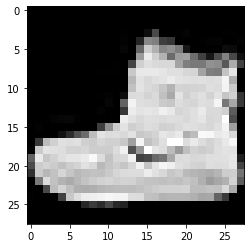

In [57]:
%matplotlib inline

#Check some basic info
import matplotlib.pyplot as plt
import numpy as np
plt.imshow(train_images[0],cmap='gray')
print('Label:'+str(train_labels[0]))
print('Number of unique labels: '+str(np.unique(train_labels)))
print('Data set size: ' + str(train_images.shape))

In [58]:
#Rasterize data

X_train = np.reshape(train_images,(train_images.shape[0],train_images.shape[1]*train_images.shape[2]))
y_train = train_labels
X_test = np.reshape(test_images,(test_images.shape[0],test_images.shape[1]*test_images.shape[2]))
y_test = test_labels


In [59]:
X_test.shape

(10000, 784)

In [60]:
#Use X_train, y_train, X_test, y_test to code your deep learning code